# Technical Indicators - [pandas-ta](https://pypi.org/project/pandas-ta/) python library

In [21]:
import yfinance as yf

In [22]:
# Specify asset ticker
ticker = 'BTC-USD'

In [23]:
# Download asset price history for the specific time interval
asset_history = yf.download(tickers=f"{ticker}", start="2021-01-01", end="2022-02-04", progress=False)
asset_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2022-02-01,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601562,36375.539062,37154.601562,37154.601562,18591534769
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792


## Technical Indicators - for the list of available indicators see [pandas-ta documentation](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html?highlight=obv#ta.volume.OnBalanceVolumeIndicator.on_balance_volume)

In [24]:
import pandas as pd
import pandas_ta as pta
import matplotlib.pyplot as plt
%matplotlib inline

## Relative Strength Index -  RSI 

In [25]:
rsi_btc = pta.rsi(asset_history['Adj Close'],length=14).dropna()
rsi_btc.tail()

Date
2022-01-31    40.200974
2022-02-01    41.744580
2022-02-02    35.041016
2022-02-03    36.281974
2022-02-04    55.858609
Name: RSI_14, dtype: float64

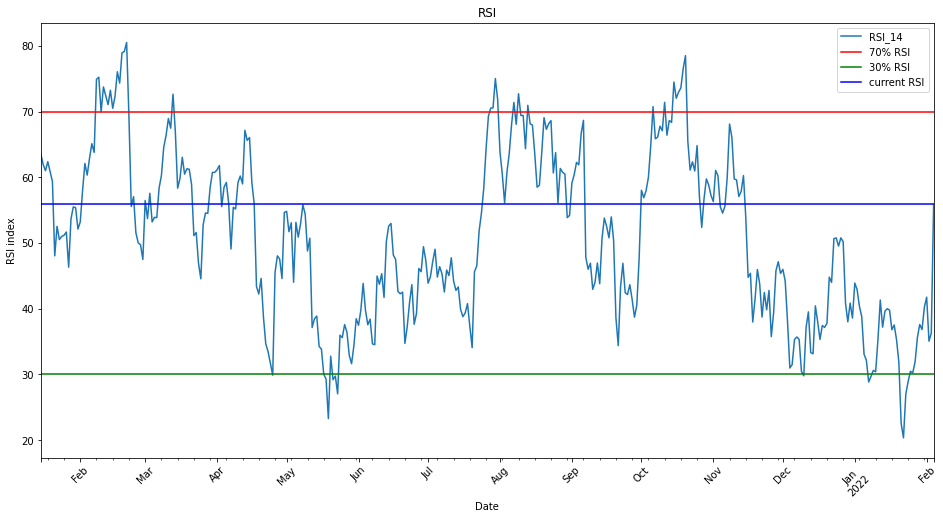

In [26]:
rsi_btc.plot(title = 'RSI', rot=45,figsize=(16,8), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_btc.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')

## Stochastic Oscilator - STOCH

In [27]:
stoch_btc = pta.stoch(asset_history['High'], asset_history['Low'],asset_history['Adj Close'],length=14)
stoch_btc.tail()

,STOCHk_14_3_3,STOCHd_14_3_3
Date,,
2022-01-31,48.800107,46.012933
2022-02-01,50.809391,48.563068
2022-02-02,47.665974,49.091824
2022-02-03,47.201196,48.558854
2022-02-04,62.311098,52.392756


<AxesSubplot:title={'center':'STOCH'}, xlabel='Date'>

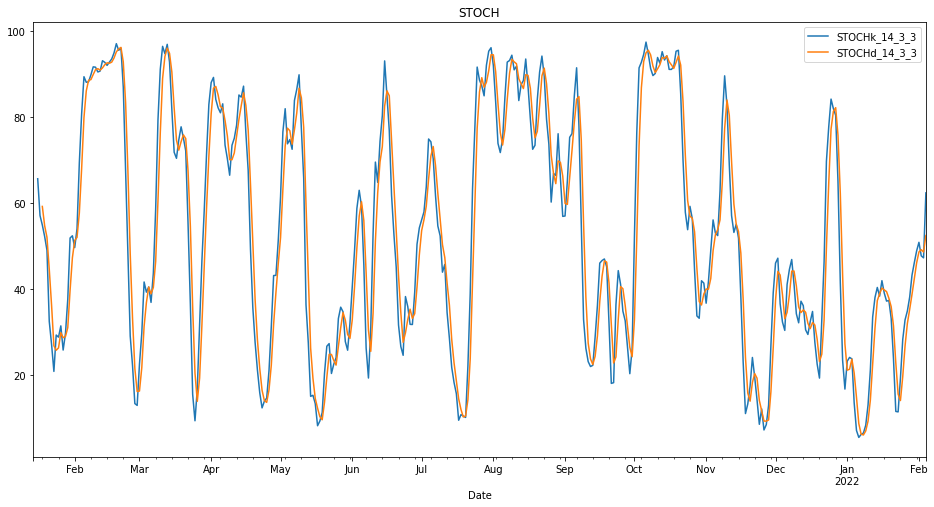

In [28]:
stoch_btc.plot(figsize=(16,8), title='STOCH', legend=True)

## On-Balance Volume - OBV

In [29]:
obv_btc = pta.obv(asset_history['Adj Close'], asset_history['Volume'])
obv_btc.tail()

Date
2022-01-31   -3.586641e+11
2022-02-01   -3.383756e+11
2022-02-02   -3.575308e+11
2022-02-03   -3.389392e+11
2022-02-04   -3.095270e+11
Name: OBV, dtype: float64

<AxesSubplot:title={'center':'OBV'}, xlabel='Date'>

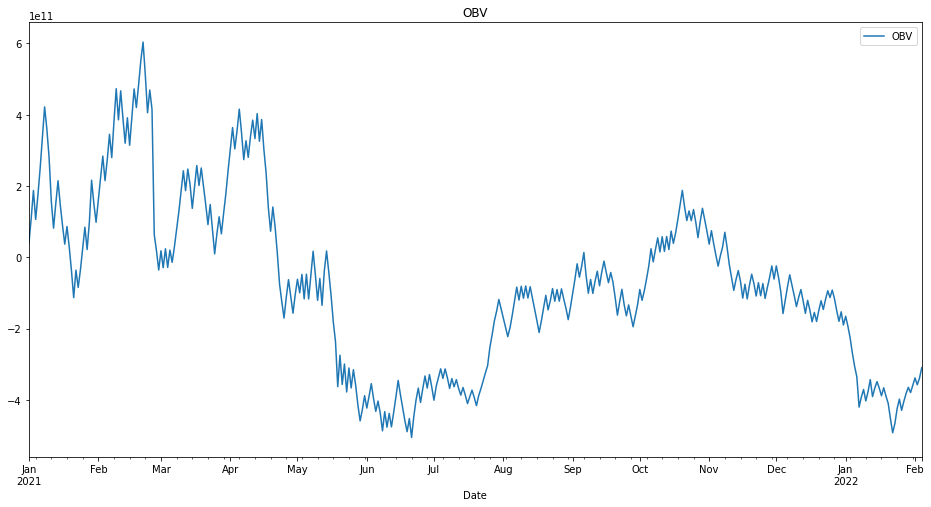

In [30]:
obv_btc.plot(figsize=(16,8), title='OBV', legend=True)

## Average Directional Movement - ADX

In [31]:
adx_btc = pta.adx(asset_history['High'], asset_history['Low'], asset_history['Adj Close'], length=14)
adx_btc.tail()

,ADX_14,DMP_14,DMN_14
Date,,,
2022-01-31,40.021124,14.559487,30.140409
2022-02-01,39.266955,15.792328,28.984953
2022-02-02,39.098148,14.588404,31.653273
2022-02-03,39.117019,14.136736,32.490190
2022-02-04,36.362619,27.612919,27.307883


<AxesSubplot:title={'center':'ADX'}, xlabel='Date'>

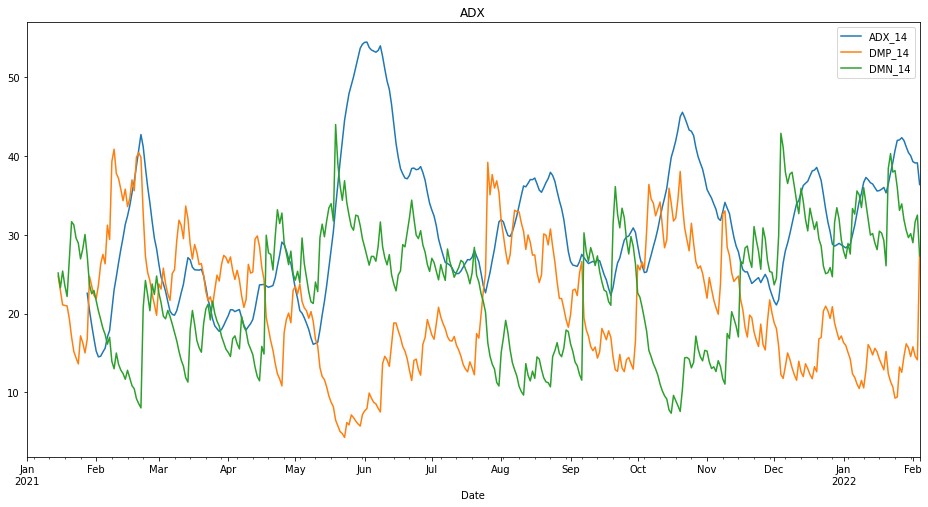

In [32]:
adx_btc.plot(figsize=(16,8), title = 'ADX', legend=True) # DMP (positive, DMN (negatve))

## Moving Average Convergence Divergence - MACD

In [33]:
macd_btc = pta.macd(asset_history['Adj Close'], fast=12, slow=26, signal=9)
macd_btc.tail()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2022-01-31,-1957.202704,289.026937,-2246.229641
2022-02-01,-1777.258266,375.177099,-2152.435366
2022-02-02,-1758.837584,314.878226,-2073.715809
2022-02-03,-1708.278270,292.350032,-2000.628301
2022-02-04,-1302.487441,558.512688,-1861.000129


<AxesSubplot:title={'center':'MACD'}, xlabel='Date'>

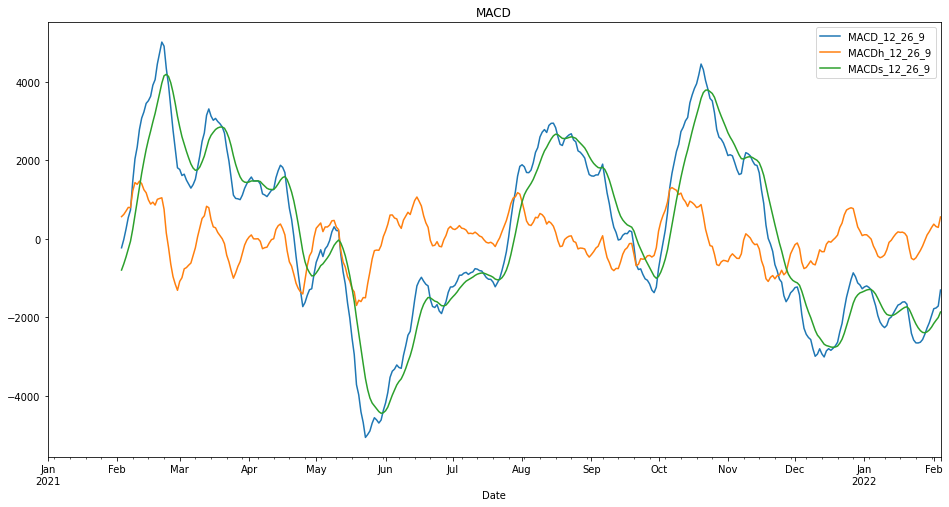

In [34]:
macd_btc.plot(figsize=(16,8), title = 'MACD') 

## Simple Moving Average - SMA

In [35]:
sma_btc = pta.sma(asset_history['Adj Close'], length=20) # change window size
sma_btc.tail()

Date
2022-01-31    39533.443750
2022-02-01    39273.152344
2022-02-02    38991.223047
2022-02-03    38693.968164
2022-02-04    38610.141992
Name: SMA_20, dtype: float64

<AxesSubplot:title={'center':'SMA'}, xlabel='Date'>

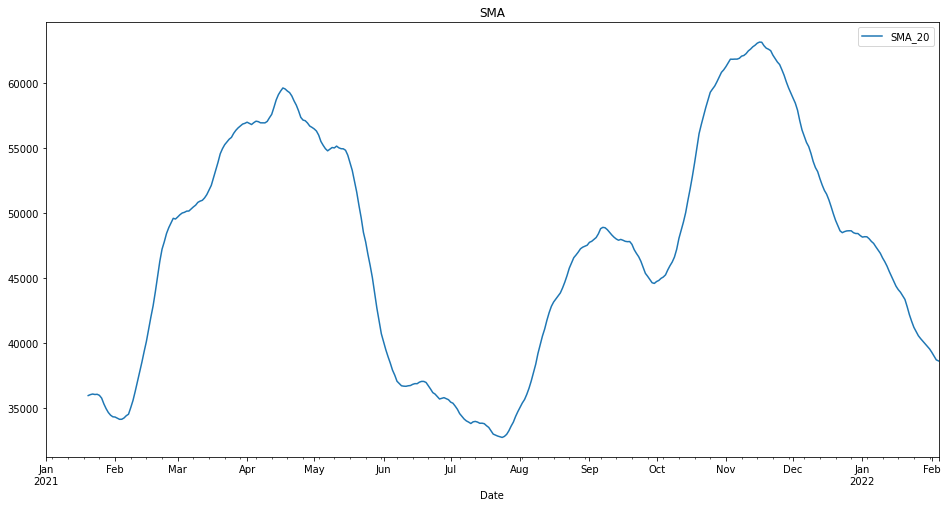

In [36]:
sma_btc.plot(figsize=(16,8), title ='SMA', legend=True) 

## Bollinger Bands - BBANDS

In [37]:
bbands_btc = pta.bbands(asset_history['Adj Close'], length=20, std=2) # change window size (length) and std dev (std)
bbands_btc.tail()

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2022-01-31,33766.864923,39533.443750,45300.022577,29.173167,0.408931
2022-02-01,33868.738227,39273.152344,44677.566461,27.522181,0.450977
2022-02-02,33722.066402,38991.223047,44260.379692,27.027399,0.306588
2022-02-03,33723.124142,38693.968164,43664.812186,25.693121,0.345160
2022-02-04,33894.561564,38610.141992,43325.722421,24.426641,0.806509


<AxesSubplot:title={'center':'BBANDS'}, xlabel='Date'>

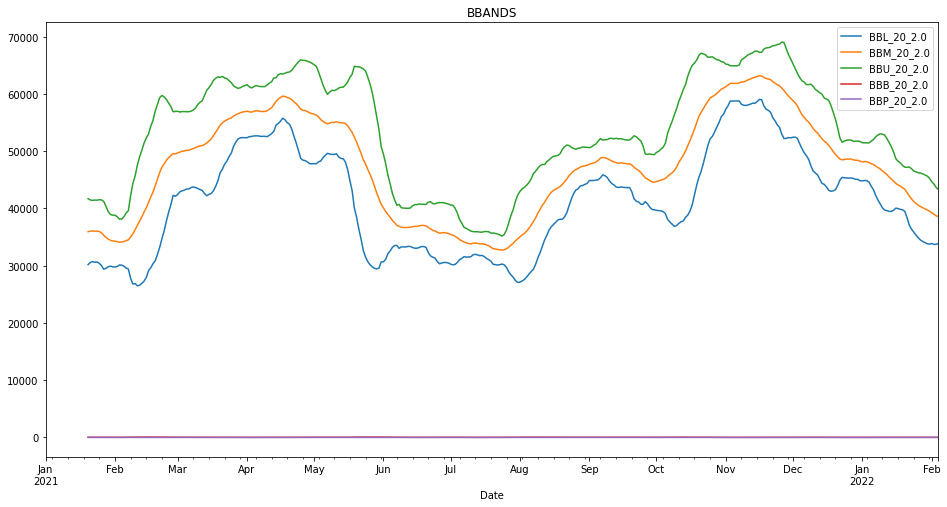

In [38]:
bbands_btc.plot(figsize=(16,8), title ='BBANDS', legend=True) 

## Accumulation/ Distribution Index - ADI

In [39]:
adi_btc = pta.ad(asset_history['High'], asset_history['Low'],asset_history['Adj Close'],asset_history['Volume'])
adi_btc.tail()

Date
2022-01-31    1.473276e+12
2022-02-01    1.478498e+12
2022-02-02    1.461644e+12
2022-02-03    1.480235e+12
2022-02-04    1.509291e+12
Name: AD, dtype: float64

<AxesSubplot:title={'center':'ADI'}, xlabel='Date'>

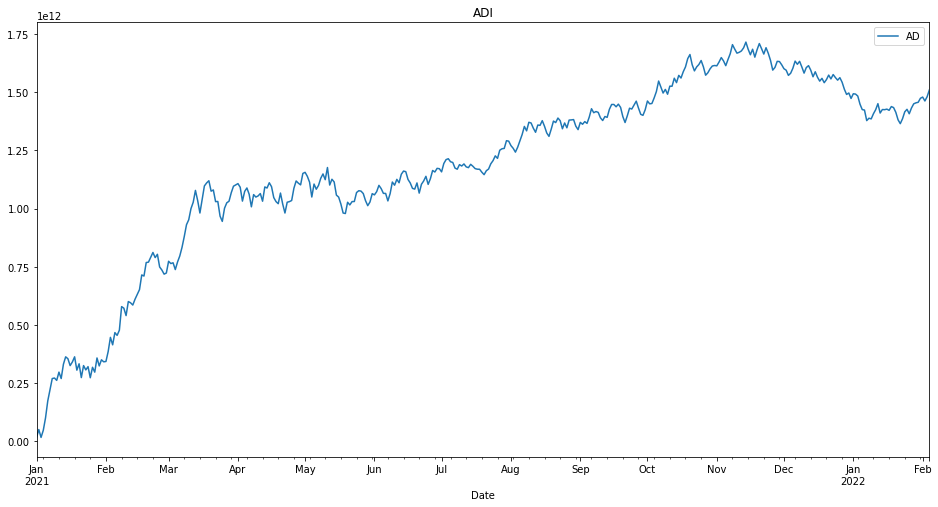

In [40]:
adi_btc.plot(figsize=(16,8), title ='ADI', legend=True) 